#Análise de dados do Airbnb - Lisboa (Portugal)

<center>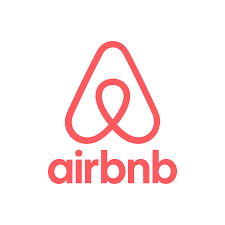</center>

**[Airbnb](https://https://www.airbnb.com.br/)** é um serviço online comunitário para as pessoas anunciarem, 
descobrirem e reservarem acomodações e meios de hospedagem. Foi fundado em Agosto de 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk em São Francisco, na Califórnia.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [**Inside Airbnb**](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Neste ***notebook*** iremos fazer uma análise exploratória dos dados referentes à cidade de **Lisboa** em Portugal.








## Instalação e importação de bibliotecas

In [1]:
# Instalação da biblioteca PIL para manipulação de imagem
!pip install pillow

In [2]:
# Importação de pacotes

# Manipulação e análise de dados
import pandas as pd
# Processamento de arrays
import numpy as np
# Plotagem de gráficos
import matplotlib.pyplot as plt
# Visualização de dados
import seaborn as sns
# Manipulação de imagens
from PIL import Image

# Para que saídas e plotagens sejam exibidas no notebook
%matplotlib inline

## Importação dos dados

Os dados usados neste *notebook* foram obtidos a partir do site [**Inside Airbnb**](http://insideairbnb.com/get-the-data.html).

Foi escolhido o seguinte arquivo referente à cidadede de Lisboa:

[**listings.csv**](https://data.insideairbnb.com/portugal/lisbon/lisbon/2021-07-10/visualisations/listings.csv) - *Summary information and metrics for listings in Lisboa (good for visualisations)*.

In [3]:
# Importação de dados
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-07-10/visualisations/listings.csv")

## Conhecendo o *dataset*
Vamos visualizar o *dataset* para conhecer o seu tamanho e variáveis.

In [4]:
# Verificando estrutura de dados - 3 primeiros registros

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143


In [5]:
# Verificação do tamanho do dataframe
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))


Número de linhas: 19458
Número de colunas: 16


In [6]:
# Verificando tipos dos dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Legenda - Nomes das colunas**:

* **id** = número de identificação do imóvel
* **name** = nome (descritivo) da propriedade anunciada
* **host_id** = número de identificação do proprietário do imóvel
* **host_name** = Nome do anfitrião
* **neighbourhood_group** = nome do distrito*
* **neighbourhood** = nome do freguesia*
* **latitude** = coordenada da latitude da propriedade
* **longitude** = coordenada da longitude da propriedade
* **room_type** = informa o tipo de hospedagem 
* **price** = preço da diária do imóvel em Dólares Americanos ($USD)
* **minimum_nights** = quantidade mínima de noites para reservar
* **number_of_reviews** = número de *reviews* que a propriedade possui
* **last_review** = data do último *review*
* **reviews_per_month** = quantidade de *reviews* por mês
* **calculated_host_listings_count** = quantidade de imóveis pertencentes ao mesmo anfitrião
* **availability_365** = número de dias de disponibilidade dentro de 365 dias

 *Em Portugal, a divisão administrativa se dá em Distritos, Concelhos e Freguesias, sendo este o de menor abrangência e o primeiro o de maior abrangência territorial. A freguesia por sua vez é um conjunto de bairros.


## Com quais dados iremos trabalhar?

O conjunto de dados importados é referente ao distrito de Lisboa, área muito ampla e com grande diferença do número de imóveis cadastrados, por isso, neste *notebook*, trabalharemos mais especificamente com os dados do concelho de **Lisboa** (que é parte do distrito de mesmo nome).

Para referência geográfica, abaixo está o mapa do concelho de Lisboa e sua divisão em freguesias.
    
---

<center><img alt="Analisando Airbnb" width="70%" src="https://www.am-lisboa.pt/imgs/imagens/1518807996S2fVZ8eq9Xt47YS8.png"></center>

---

Neste ponto, será feito uma filtragem nos dados de interesse.



In [7]:
# Verificando o nome e a quantidade de concelhos
df.neighbourhood_group.unique()
print('Número de Concelhos: {}'.format(df.neighbourhood_group.unique().shape[0]))

Número de Concelhos: 16


In [8]:
# Verificando as freguesias pertencentes ao concelho de Lisboa 
print(df.neighbourhood[df.neighbourhood_group == 'Lisboa'].unique())
print('Quantidade de Freguesias: {}'.format(df.neighbourhood[df.neighbourhood_group == 'Lisboa'].unique().shape[0]))

['Belm' 'Santa Maria Maior' 'Estrela' 'Avenidas Novas' 'Lumiar'
 'Misericrdia' 'So Vicente' 'Santo Antnio' 'So Domingos de Benfica'
 'Penha de Frana' 'Arroios' 'Alcntara' 'Alvalade' 'Parque das Naes'
 'Areeiro' 'Campolide' 'Ajuda' 'Benfica' 'Olivais' 'Campo de Ourique'
 'Marvila' 'Beato' 'Carnide' 'Santa Clara']
Quantidade de Freguesias: 24


Portanto, o **concelho** de Lisboa possui 24 freguesias.

Para sanar algumas dúvidas, lista com o significado das abreviações:

*   Alcntara -> Alcântara
*   Belm -> Belém
*   Misericrdia -> Misericórdia
*   Parque das Naes -> Parque das Nações
*   Penha de Frana -> Penha de França
*   Santo Antnio -> Santo Antônio
*   So Domingos de Benfica -> São Domingos de Benfica
*   So Vicente -> São Vicente

##Novo *datraframe* - Concelho de Lisboa

Criação de novo *dataframe* contendo apenas dados referentes ao Concelho de Lisboa.

In [9]:
# Criação do dataframe
df_lisboa = df[df.neighbourhood_group == 'Lisboa']

In [10]:
# Verificação
df_lisboa.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143


In [11]:
# Verificando quantidade de entradas
print("Número de linhas: {}".format(df_lisboa.shape[0]))
print("Número de colunas: {}".format(df_lisboa.shape[1]))


Número de linhas: 13744
Número de colunas: 16


Do total inicial de 19458 registros, trabalharemos com 13744.

## Dados faltantes

Verificação de dados faltantes

In [12]:
# Quantidade de dados faltantes
df_lisboa.isnull().sum()

id                                   0
name                                10
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2343
reviews_per_month                 2343
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
# Percentual de dados faltantes em ordem decrescente
((df_lisboa.isnull().sum() / df_lisboa.shape[0])*100).sort_values(ascending = False)

reviews_per_month                 17.047439
last_review                       17.047439
name                               0.072759
host_name                          0.036380
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Verifica-se que este *dataset* não possui dados numéricos faltantes. Embora o número de *reviews* faltantes seja alto, não usaremos estes dados neste *notebook*.

## Estudo estatístico simplificado
Foram escolhidas algumas colunas com dados numéricos para um estudo inicial.

In [14]:
# Resumo estatístico
df_lisboa[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13744.000000,13744.000000,13744.000000,11401.000000,13744.000000,13744.000000
mean,97.207218,3.635405,52.522483,1.368765,16.812573,217.754948
std,258.744871,11.373684,76.607148,1.369368,40.114383,126.981231
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,2.000000,0.340000,2.000000,105.000000
50%,69.000000,2.000000,18.000000,1.000000,5.000000,249.000000
75%,100.000000,3.000000,75.000000,2.030000,13.000000,337.000000
max,11499.000000,365.000000,1294.000000,40.450000,275.000000,365.000000


Alguns pontos para se observar nesta descrição:


*   A média de preço muito inferior ao desvio padrão, e grande diferença entre o percentil 75 e o valor máximo, o que indica que *outliers* estão bem acima da média;
*   Média do número mínimo de noites para aluguel muito acima do esperado para este ramo de negócio;
*   O fato da média de imóveis por usuário é alta, pois a identificação é feita apenas pelo primeiro nome.



### Histogramas
Vamos verificar gráficos tipo histograma para entender alguns dados.

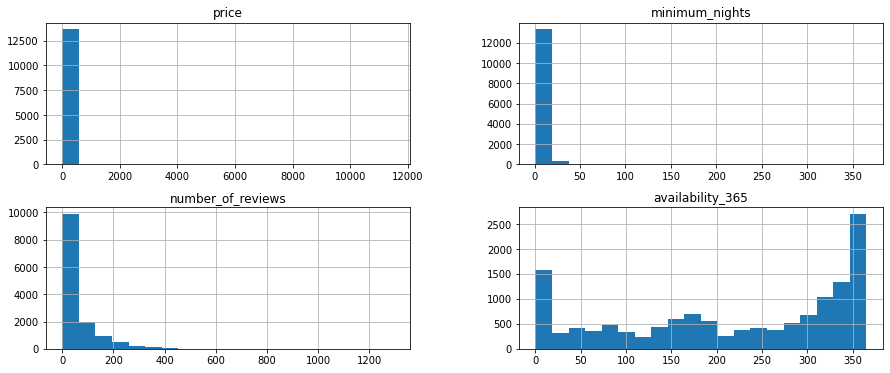

In [15]:
# Histograma das variáveis numéricas
df_lisboa.hist(column=['price','minimum_nights','number_of_reviews','availability_365'], bins=20, figsize=(15,6));

Chama a  atenção a forma dos histogramas acima. Faremos uma verificação de valores *outliers* e filtragem dos mesmos.

### Verificação de outliers

Para facilitar a visualização, mostraremos para as variáveis **minimum_nights** o máximo de 18 noites e para **price** o máximo de $USD 500.

Terceiro quartil: 3.0 noites
Primeiro quartil: 1.0 noites
Distância interquartílica: 2.0 noites
Outliers acima de: 6.00 noites

Valores acima de 6.0 noites: 815 entradas
Corresponde a 5.93% do total de entradas


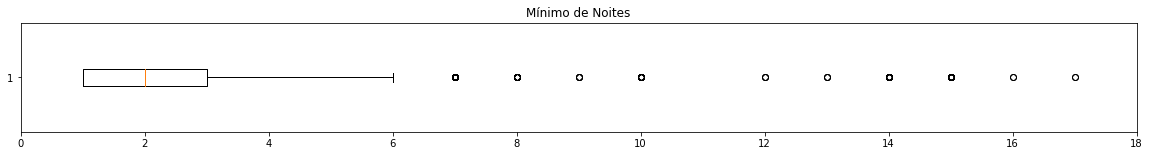

In [66]:
# Boxplot para Mínimo de Noites
plt.figure(figsize=(20, 2))
plt.boxplot(df_lisboa.minimum_nights,vert=False)
plt.xlim(0, 18)
plt.title('Mínimo de Noites');

# Cálculo boxplot
print('Terceiro quartil: {} noites'.format(df_lisboa.minimum_nights.quantile(.75)))
print('Primeiro quartil: {} noites'.format(df_lisboa.minimum_nights.quantile(.25)))
print('Distância interquartílica: {} noites'.format(df_lisboa.minimum_nights.quantile(.75)-df_lisboa.minimum_nights.quantile(.25)))
print('Outliers acima de: {:.2f} noites\n'.format((df_lisboa.minimum_nights.quantile(.75)+\
                                                   ((df_lisboa.minimum_nights.quantile(.75)-df_lisboa.minimum_nights.quantile(.25))*1.5))))
out_night = (df_lisboa.minimum_nights.quantile(.75)+((df_lisboa.minimum_nights.quantile(.75)-df_lisboa.minimum_nights.quantile(.25))*1.5))
# Verificar quantidade de valores outliers
print('Valores acima de {} noites: {} entradas'.format(out_night,len(df_lisboa[df_lisboa.minimum_nights>out_night])))
print('Corresponde a {:.2f}% do total de entradas'.format((len(df_lisboa[df_lisboa.minimum_nights>out_night])/df_lisboa.shape[0])*100))


Pelo **boxplot** acima, verifica-se que 5.93% são *outliers* e serão excluídos em seguida.

Terceiro quartil: $USD 100.0
Primeiro quartil: $USD 48.0
Distância interquartílica: $USD 52.0
Outliers acima de: $USD 178.00 por noite

Valores acima de $USD 178.0 por noite: 1054 entradas
Corresponde a 7.67% do total de entradas


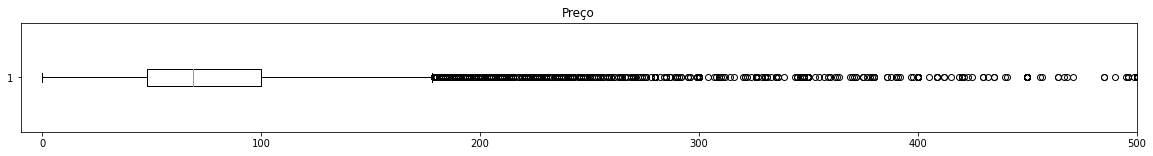

In [65]:
# Boxplot para Preço
plt.figure(figsize=(20, 2))
plt.boxplot(df_lisboa.price,vert=False)
plt.xlim(-10, 500)
plt.title('Preço');

# Cálculo boxplot
print('Terceiro quartil: $USD {}'.format(df_lisboa.price.quantile(.75)))
print('Primeiro quartil: $USD {}'.format(df_lisboa.price.quantile(.25)))
print('Distância interquartílica: $USD {}'.format(df_lisboa.price.quantile(.75)-df_lisboa.price.quantile(.25)))
print('Outliers acima de: $USD {:.2f} por noite\n'.format\
      ((df_lisboa.price.quantile(.75)+((df_lisboa.price.quantile(.75)-df_lisboa.price.quantile(.25))*1.5))))

out_price = (df_lisboa.price.quantile(.75)+((df_lisboa.price.quantile(.75)-df_lisboa.price.quantile(.25))*1.5))

# Verificar quantidade de valores outliers
print('Valores acima de $USD {} por noite: {} entradas'.format(out_price,len(df_lisboa[df_lisboa.price>out_price])))
print('Corresponde a {:.2f}% do total de entradas'.format((len(df_lisboa[df_lisboa.price>out_price])/df_lisboa.shape[0])*100))

Pelo **boxplot** acima, verifica-se que 7.67% são *outliers* e serão excluídos em seguida.

## Remover outliers
Neste *notebook*, foi considerado como relevante a eliminação de *outliers* apenas para as variáveis "*price*" e "*minimum_nights*". 

In [18]:
# Novo dataframe sem outliers
df_clean = df_lisboa.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > out_night].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > out_price].index, axis=0, inplace=True)

# Verificando quantidade de entradas
print("Número de linhas: {}".format(df_clean.shape[0]))
print("Número de colunas: {}".format(df_clean.shape[1]))

Número de linhas: 11919
Número de colunas: 16


Portanto, neste ponto foram excluídos 1825 registros, ficando o *dataframe* **df_clean** com 11919 registros.

Agora verificaremos os **histogramas** sem *outliers*:

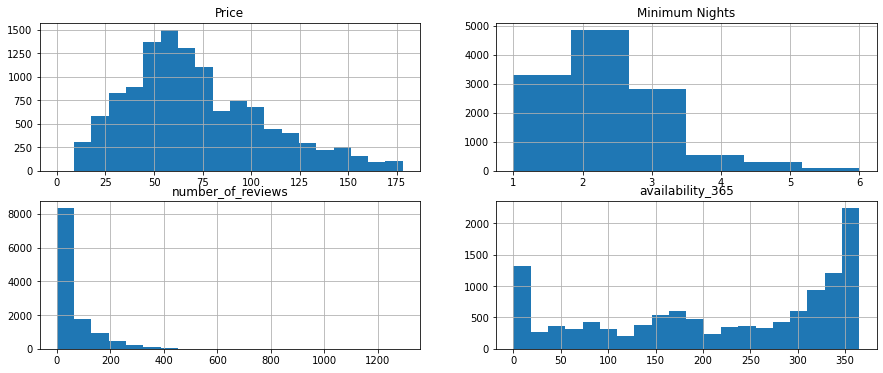

In [19]:
# Plotar histogramas

fig = plt.figure(figsize=(15, 6))

# Gráfico 1
fig.add_subplot(221)
plt.grid()
plt.title('Price')
plt.hist(df_clean.price, bins=20);

# Gráfico 2
fig.add_subplot(222)
plt.grid()
plt.title('Minimum Nights')
plt.hist(df_clean.minimum_nights, bins=6);

# Gráfico 3
fig.add_subplot(223)
plt.grid()
plt.title('number_of_reviews')
plt.hist(df_clean.number_of_reviews, bins=20);

# Gráfico 4
fig.add_subplot(224)
plt.grid()
plt.title('availability_365')
plt.hist(df_clean.availability_365, bins=20);

###Tipos de imóveis
Agora faremos uma verifição sobre  os tipos de acomodações no Airbnb.

In [20]:
# Quantidade por tipo de acomodação
for n in range (0, len(df_clean.room_type.unique())):
   print('{}: {}'.format(df_clean.room_type.value_counts().index[n],df_clean.room_type.value_counts()[n]))


Entire home/apt: 9052
Private room: 2430
Hotel room: 221
Shared room: 216


TIPOS DE ACOMODAÇÃO:

* **Entire home/apt**   -> Lugares inteiros (todo o imóvel).

* **Private room**      -> Quarto privado.

* **Hotel room**        -> Oferecem o nível de serviço e a hospitalidade associados aos hotéis tradicionais.

* **Shared room**       ->  Quarto compartilhado.

In [21]:
# Percentual por tipo de imóvel
n = 0
for n in range (0, len(df_clean.room_type.unique())):
   print('{}: {:.2f}%'.format(df_clean.room_type.value_counts().index[n],df_clean.room_type.value_counts(1)[n]*100))

Entire home/apt: 75.95%
Private room: 20.39%
Hotel room: 1.85%
Shared room: 1.81%


In [22]:
# Manipulação para construção do gráfico de tipos de acomodação
df_tipos = df_clean.room_type.value_counts()
tipos_df=pd.DataFrame(df_tipos)
tipos_df.reset_index(inplace=True)
tipos_df.rename(columns={'index':'room_type', 'room_type':'Count'}, inplace=True)
tipos_df

,room_type,Count
0,Entire home/apt,9052
1,Private room,2430
2,Hotel room,221
3,Shared room,216


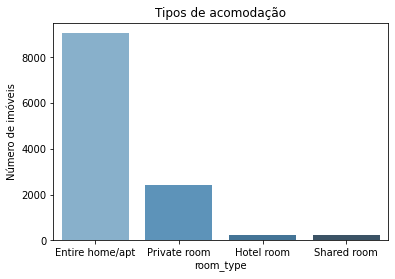

In [23]:
# Plotagem do gráfico: Tipos de acomodação
tipos=sns.barplot(x="room_type", y='Count', data=tipos_df, palette='Blues_d')
tipos.set_title('Tipos de acomodação')
tipos.set_ylabel('Número de imóveis');


### Quantidade de imóveis por freguesia

In [24]:
# Quantidade absoluta
for n in range (0, len(df_clean.neighbourhood.unique())):
  print('{}: {}'.format(df_clean.neighbourhood.value_counts().index[n], df_clean.neighbourhood.value_counts()[n]))

print('\nMédia de imóveis por freguesia: {:.0f}'.format(df_clean.neighbourhood.value_counts().mean()))

Santa Maria Maior: 2769
Misericrdia: 2043
Arroios: 1519
So Vicente: 958
Santo Antnio: 934
Estrela: 686
Avenidas Novas: 552
Penha de Frana: 380
Areeiro: 258
Belm: 240
Campo de Ourique: 227
Alcntara: 213
Parque das Naes: 185
Campolide: 144
Alvalade: 140
Olivais: 129
Ajuda: 120
So Domingos de Benfica: 110
Lumiar: 79
Beato: 73
Marvila: 63
Benfica: 49
Carnide: 28
Santa Clara: 20

Média de imóveis por freguesia: 497


In [25]:
# Percentual de imóveis por freguesia
for n in range (0, len(df_clean.neighbourhood.unique())):
  print(('{}:  {:.2f}%'.format(df_clean.neighbourhood.value_counts().index[n], df_clean.neighbourhood.value_counts(1)[n]*100)))


Santa Maria Maior:  23.23%
Misericrdia:  17.14%
Arroios:  12.74%
So Vicente:  8.04%
Santo Antnio:  7.84%
Estrela:  5.76%
Avenidas Novas:  4.63%
Penha de Frana:  3.19%
Areeiro:  2.16%
Belm:  2.01%
Campo de Ourique:  1.90%
Alcntara:  1.79%
Parque das Naes:  1.55%
Campolide:  1.21%
Alvalade:  1.17%
Olivais:  1.08%
Ajuda:  1.01%
So Domingos de Benfica:  0.92%
Lumiar:  0.66%
Beato:  0.61%
Marvila:  0.53%
Benfica:  0.41%
Carnide:  0.23%
Santa Clara:  0.17%


### Freguesias mais caras


In [26]:
# Valor médio das 5 freguesias mais caras

mais = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

for n in range(5):
  print('{}: $USD {:.2f}'.format(mais.index[n], mais[n]))

Parque das Naes: $USD 92.49
Misericrdia: $USD 78.17
Lumiar: $USD 78.08
Santa Maria Maior: $USD 77.96
Santo Antnio: $USD 77.61


### Freguesias mais baratas

In [27]:
# Valor médio das 5 freguesias mais baratas

menos = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-5:]

for n in range(5):
  print('{}: $USD {:.2f}'.format(menos.index[n], menos[n]))


Alvalade: $USD 56.69
Beato: $USD 56.11
Areeiro: $USD 55.14
Santa Clara: $USD 52.50
Benfica: $USD 51.27


### Localização
Finalizando este estudo, plotamos 2 gráficos com a geolocalização dos imóveis.

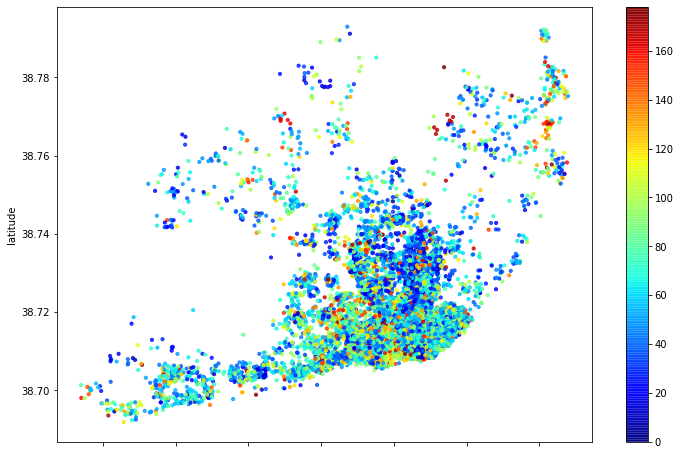

In [28]:
# Plotar por latitude / longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.8, c=df_clean['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(12,8));    

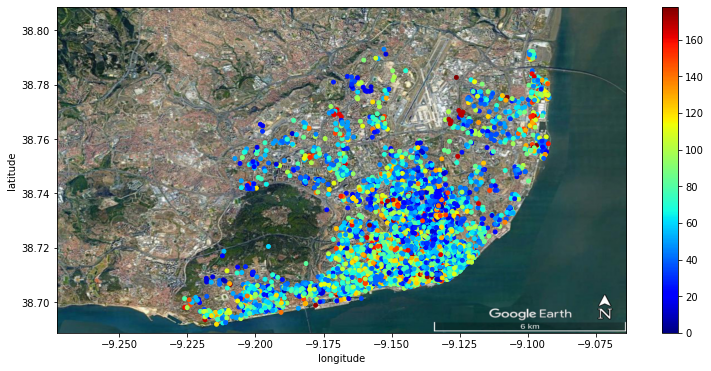

In [30]:
# Plotar gráfico sobre imagem satélite
plt.figure(figsize=(13,6))
img = Image.open('/content/lisboa.jpg') 
plt.imshow(img, zorder=0, extent=[-9.273,-9.064,38.6888,38.8086])
ax=plt.gca()

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=2, c=df_clean['price'], s=15, cmap=plt.get_cmap('jet'), ax=ax, zorder=5);

plt.show()

## Conclusão

Este *dataset* disponibilizado pelo **Airbnb** é rico em informações sobre acomodações no **Distrito de Lisboa**. Neste trabalho, concentramos-nos em uma análise exploratória das principais variáveis. Inicialmente exploramos o sifnificado de cada coluna e seus valores e resolvemos filtrar nossos dados apenas para o **Concelho de Lisboa**. Fizemos umas verificação sobre dados faltantes, o que mostrou que os dados numéricos estavam todos preenchidos. Em seguida, fizemos uma busca por *outliers* e posteriormente sua retirada do *dataframe*. Isso tornou nossa análise menos suceptível à "ruídos" causados por imóveis com valores muito acima da mediana dos dados. Também analisamos brevemente o quantitativo dos tipos de acomodações disponíveis, as freguesias com maior e menor custo por noite e finalmente fizemos a plotagem de gráficos baseados nos dados de geolocalização de cama imóvel.

Isso nos deu uma visão abrangente sobre a atuação do **Airbnb** na cidade de **Lisboa**, e um conhecimento valioso sobre os dados disponibilizados pela empresa. Trabalhos futuros podem incluir um estudo sobre os *reviews*, cruzando dados com os *hosts* habituais da plataforma, comparação com outros centros urbanos, busca de correlações matemáticas entre as variáveis e, para as cidades com grande apelo turístico (como é o caso do nosso *dataframe*), um estudo baseado na proximidade com locais de interesse.

Sugestões, correções e dicas são sempre bem vindas.